In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import random
import seaborn as sns
from scipy import stats

dpi=400
default_hatch_patterns = ["o" , "x", "." , "*" , "." , "\\" , "O", ".", "*"]
default_color = "0.80"
default_box_width = 14
default_box_marker = "|"
default_box_marker_size = 20
default_box_marker_alpha = 0.8
default_grid_color = "0.8"
df = pd.read_csv("TYU07_corrigido.csv").drop('Unnamed: 0', axis=1)

In [2]:
def draw_z_score(z_sample, alpha, direction, title):
    
    if direction == "<":
        zc = stats.norm.ppf(alpha)
    elif direction == ">":
        zc = stats.norm.ppf(1-alpha)
    else:
        alpha = alpha/2
        zc = stats.norm.ppf(1-alpha)
        
    lim = math.ceil(max(3, abs(z_sample) + 1))
    x = np.arange(-lim, lim, 0.001)
    y = stats.norm.pdf(x, 0, 1)
    if direction == "<":
        z = x[x < zc]
    elif direction == ">":
        z = x[x > zc]
    else:
        z = x[x < -zc]
        z2 = x[x > zc]
        
    fig, ax = plt.subplots(figsize=(7,4))    
    ax.plot(x, y, color='black', lw=0.8)
    ax.fill_between(z, 0, stats.norm.pdf(z, 0, 1), facecolor='0.7')
    if direction != "<" and direction != ">":
        ax.fill_between(z2, 0, stats.norm.pdf(z2, 0, 1), facecolor='0.7')
    ax.set(xbound =(-lim, lim), ybound = (0,0.5))
    
    # Insere anotação sobre a linha de média
    ax.annotate('z_sample = {:0.3f}'.format(z_sample), xy=(z_sample, 0), xytext=(0, 25),
            xycoords=('data', 'axes fraction'), textcoords='offset points', horizontalalignment="center", verticalalignment='bottom',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))
    
    # Insere anotação sobre a linha de média
    ax.annotate('z_c = ' + str(round(zc,3)) + '\nα = ' + str(alpha), xy=(zc, 0), xytext=(0, -25),
            xycoords=('data', 'axes fraction'), textcoords='offset points', horizontalalignment="center", verticalalignment='top',
            arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))
    
    if direction != "<" and direction != ">":
        # Insere anotação sobre a linha de t critico
        ax.annotate('-z_c = ' + str(round(-zc,3)) + '\nα = ' + str(alpha), xy=(-zc, 0), xytext=(0, -25),
                xycoords=('data', 'axes fraction'), textcoords='offset points', horizontalalignment="center", verticalalignment='top',
                arrowprops=dict(arrowstyle='-|>', fc='black', shrinkA=0, shrinkB=0), bbox=dict(boxstyle="round", alpha=0.7, fc='white'))    
    

# Terceira parte – Análise da variável Turno

## Questão 3
Há interesse em avaliar a Turno dos alunos. Retire uma amostra aleatória de 200 elementos (novamente, primeiramente exclua as linhas com dados perdidos). Registre a proporção amostral de alunos do turno Integral e responda os itens a seguir:

In [3]:
N = 200
dfreedom = N - 1
sampleTurno = random.sample(df["Turno"].dropna().tolist(), N)
df3a = pd.DataFrame()
df3a["Número de ocorrências"] = pd.Series(sampleTurno).value_counts()
df3a["Frequência relativa"] = df3a["Número de ocorrências"] / df3a["Número de ocorrências"].sum()
sample_p = df3a["Frequência relativa"]["Integral"]
sample_q = 1 - sample_p
print(df3a)
print("\np = " + str(sample_p))

          Número de ocorrências  Frequência relativa
Noturno                      77                0.385
Diurno                       63                0.315
Integral                     60                0.300

p = 0.3


### 3.a) É possível aproximar a distribuição amostral da proporção por uma normal para cálculo do intervalo de confiança da proporção de alunos do turno Integral? JUSTIFIQUE.

In [4]:
print("Sim, pois np = {0} >= 5 e nq = {1} >= 5".format(N*sample_p, N*sample_q))

Sim, pois np = 60.0 >= 5 e nq = 140.0 >= 5


### 3.b) Independente dos resultados da letra a), encontre o intervalo de 95% de confiança para a proporção populacional de alunos do turno Integral. Interprete o resultado.

É possível aproximar a distribuição amostral da proporção p para uma normal

In [5]:
zc = stats.norm.ppf(0.975)
error_95 = zc*math.sqrt((sample_p*(1-sample_p))/N)
print("O intervalo de 95% de confiança é de {0} a {1}, variando {2} em torno da proporção amostral {3}".format(
        round(sample_p - error_95, 3), round(sample_p + error_95, 3), round(error_95, 3), round(sample_p, 3)))

O intervalo de 95% de confiança é de 0.236 a 0.364, variando 0.064 em torno da proporção amostral 0.3


### 3.c) Independente dos resultados da letra a), qual seria o tamanho mínimo de amostra para obter um intervalo de 95% para a proporção populacional de alunos do turno Integral com uma precisão de 5%. A amostra coletada é suficiente? JUSTIFIQUE.

In [6]:
zc = stats.norm.ppf(0.975)
error = 0.05
n_min = math.ceil(sample_p * sample_q * (zc/error)**2)
print("Caso seja utilizada a proporção amostral enconrtada nesta amostra, " + str(n_min))

Caso seja utilizada a proporção amostral enconrtada nesta amostra, 323


### 3.d) Independente dos resultados da letra a), qual seria o tamanho mínimo de amostra para obter um intervalo de 95% para a proporção populacional de alunos do turno Integral com uma precisão de 5%, se você não pudesse ter tirado a amostra piloto?

In [7]:
zc = stats.norm.ppf(0.975)
error = 0.05
n_min = math.ceil(0.5 * 0.5 * (zc/error)**2)
print("Caso não haja uma proporção amostral inicial, " + str(n_min))

Caso não haja uma proporção amostral inicial, 385


### 3.e) Um colega acredita que a proporção de alunos do turno Integral é menor do que 35% (0,35) e você não
### 3.e.1) É possível aproximar a distribuição amostral da proporção por uma normal para a realização de teste de hipóteses da proporção de alunos do turno Integral? JUSTIFIQUE.

In [8]:
pop_p = 0.35
pop_q = 1 - pop_p
print("Sim, pois np = {0} >= 5 e nq = {1} >= 5".format(N*pop_p, N*pop_q))

Sim, pois np = 70.0 >= 5 e nq = 130.0 >= 5


### f) Independente dos resultados do item e.1, aplicando o teste de hipóteses apropriado a 5% de significância o seu colega está certo? JUSTIFIQUE.

H0: pop_p >= 0.35

H1: pop_p < 0.35

In [9]:
zc = -stats.norm.ppf(0.95)
z = (sample_p - pop_p)/math.sqrt(pop_p * pop_q / N)
print("sample_p = " + str(round(sample_p,3)) + "\npop_p = " + str(round(pop_p,3)))
print("zc = " + str(round(zc,3)) + "\nz = " + str(round(z,3)))

sample_p = 0.3
pop_p = 0.35
zc = -1.645
z = -1.482


Não é possível rejeitar a hipótese de que o colega esteja errado, portanto não se pode afirmar de que ele está certo.

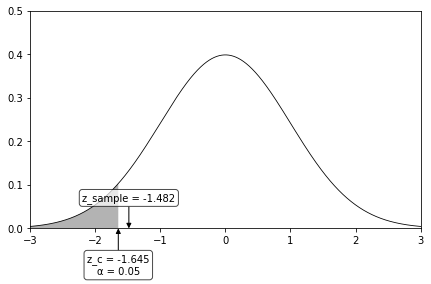

In [14]:
draw_z_score(z_sample = z, alpha = 0.05, direction = '<', title='')

# Salva figura na pasta dedicada
plt.savefig('Figuras\Q3f.png', bbox_inches='tight', dpi=dpi)

### g) Analise o intervalo de confiança da letra b). Os limites encontrados corroboram os resultados encontrados na letra f)? JUSTIFIQUE.

In [11]:
print("Intervalo: de {0} a {1}".format(round(sample_p - error_95, 3), round(sample_p + error_95, 3)))

Intervalo: de 0.236 a 0.364


### h) Independente dos resultados do item e.1, se a proporção real de alunos do turno Integral fosse igual a 33% (0,33) qual seria o poder do teste? Você acha o valor aceitável? JUSTIFIQUE.

### i) Independente dos resultados do item e.1, qual deveria ser o tamanho mínimo de amostra para detectar com 95% de probabilidade que a proporção populacional de alunos do turno Integral é igual a 0,33. Use 5% de significância. A amostra coletada é suficiente? JUSTIFIQUE.

# NÃO SEI

In [12]:
pop_p = 0.33
pop_q = 1 - pop_p
sample_p = 0.5 # Escolhido para o pior caso
zc = stats.norm.ppf(0.975)
n_min = math.ceil(((zc**2) * pop_p * pop_q)/((sample_p - pop_p)**2))
print(n_min)

30
